# LANDSLIDE RISK

The purpose of this notebook is to generate the FEMA assessed Landslide risk data
- preliminary investigations show that the regions in our data set are higher on the scale

[FEMA Map](https://hazards.fema.gov/nri/map)

[FEMA Data Download](https://hazards.fema.gov/nri/data-resources)

After succesfull run of the notebook, datafile with landslide risk parameters will be generated


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Download the shp file for all counties from URL and save to ../..data/lanslide directory

In [2]:
%%time
odir = "../../data/landslide"
from os.path import isfile, isdir
from posix import mkdir 

odir = "../../data/landslide"
if not isdir(odir):
    mkdir(odir)

# for state in states:
url = "https://hazards.fema.gov/nri/Content/StaticDocuments/DataDownload//NRI_Shapefile_Counties/NRI_Shapefile_Counties.zip"
ofile=odir + "/" +"NRI_Shapefile_Counties.zip"
print(url)
if not isfile(ofile):
    !curl -o $ofile $url 
    !unzip -d $odir $ofile

In [3]:
%%time
# Read the shapefile into Geopandas dataframe
landslide_file ="../../data/landslide/NRI_Shapefile_Counties.shp"
landslide=gpd.read_file(landslide_file)#.set_crs('epsg:4326')
landslide

CPU times: user 4min 32s, sys: 817 ms, total: 4min 33s
Wall time: 4min 33s


,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,...,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_N,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER,Shape_Leng,Shape_Area,geometry
0,C01001,Alabama,AL,01,Autauga,County,001,01001,58764,9.123274e+09,...,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023,249970.262434,2.208589e+09,"POLYGON ((-9619432.840 3847073.744, -9619428.2..."
1,C01003,Alabama,AL,01,Baldwin,County,003,01003,231365,4.596848e+10,...,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023,923868.312116,5.730947e+09,"MULTIPOLYGON (((-9787951.364 3588674.829, -978..."
2,C01005,Alabama,AL,01,Barbour,County,005,01005,25160,4.847697e+09,...,2.347236e-08,7.606598e-07,16.125039,15501.730336,19.535476,Very Low,March 2023,320882.938340,3.257909e+09,"POLYGON ((-9491049.106 3781487.459, -9490968.1..."
3,C01007,Alabama,AL,01,Bibb,County,007,01007,22239,3.146947e+09,...,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023,227920.125168,2.311979e+09,"POLYGON ((-9687669.284 3924165.445, -9687659.8..."
4,C01009,Alabama,AL,01,Blount,County,009,01009,58992,7.815620e+09,...,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023,292630.369977,2.456906e+09,"POLYGON ((-9622917.941 4063649.874, -9622939.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,C72151,Puerto Rico,PR,72,Yabucoa,Municipio,151,72151,30397,3.345120e+09,...,0.000000e+00,0.000000e+00,0.000000,-9999.000000,-9999.000000,Insufficient Data,March 2023,82526.137182,1.591967e+08,"MULTIPOLYGON (((-7324276.288 2045554.396, -732..."
3227,C72153,Puerto Rico,PR,72,Yauco,Municipio,153,72153,34151,3.045488e+09,...,0.000000e+00,0.000000e+00,0.000000,-9999.000000,-9999.000000,Insufficient Data,March 2023,82432.398529,1.966493e+08,"POLYGON ((-7439168.984 2057527.212, -7439075.9..."
3228,C78010,Virgin Islands,VI,78,St. Croix,Island,010,78010,40913,9.738791e+09,...,0.000000e+00,0.000000e+00,0.000000,-9999.000000,-9999.000000,Insufficient Data,March 2023,133584.324886,2.414592e+08,"MULTIPOLYGON (((-7202590.650 2008339.077, -720..."
3229,C78020,Virgin Islands,VI,78,St. John,Island,020,78020,3882,1.235459e+09,...,0.000000e+00,0.000000e+00,0.000000,-9999.000000,-9999.000000,Insufficient Data,March 2023,102429.057350,5.704408e+07,"MULTIPOLYGON (((-7216422.887 2079775.567, -721..."


In [4]:
%%time
# convert coordinate system
landslide = landslide.to_crs(4326)
landslide.head()

CPU times: user 4.47 s, sys: 220 ms, total: 4.69 s
Wall time: 4.69 s


,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,...,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_N,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER,Shape_Leng,Shape_Area,geometry
0,C01001,Alabama,AL,01,Autauga,County,001,01001,58764,9.123274e+09,...,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023,249970.262434,2.208589e+09,"POLYGON ((-86.41284 32.63589, -86.41279 32.625..."
1,C01003,Alabama,AL,01,Baldwin,County,003,01003,231365,4.596848e+10,...,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023,923868.312116,5.730947e+09,"MULTIPOLYGON (((-87.92666 30.66002, -87.92688 ..."
2,C01005,Alabama,AL,01,Barbour,County,005,01005,25160,4.847697e+09,...,2.347236e-08,7.606598e-07,16.125039,15501.730336,19.535476,Very Low,March 2023,320882.938340,3.257909e+09,"POLYGON ((-85.25954 32.13837, -85.25882 32.138..."
3,C01007,Alabama,AL,01,Bibb,County,007,01007,22239,3.146947e+09,...,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023,227920.125168,2.311979e+09,"POLYGON ((-87.02581 33.21717, -87.02573 33.209..."
4,C01009,Alabama,AL,01,Blount,County,009,01009,58992,7.815620e+09,...,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023,292630.369977,2.456906e+09,"POLYGON ((-86.44414 34.25913, -86.44434 34.256..."


In [5]:
#select the LNDS features which indicate the landslide risk scores 
risk_index = landslide[['geometry', 'LNDS_RISKV', 'LNDS_RISKS', 'LNDS_RISKR']]
risk_index.head()

,geometry,LNDS_RISKV,LNDS_RISKS,LNDS_RISKR
0,"POLYGON ((-86.41284 32.63589, -86.41279 32.625...",24999.667317,41.760360,Relatively Low
1,"MULTIPOLYGON (((-87.92666 30.66002, -87.92688 ...",37576.582245,72.502409,Relatively Low
2,"POLYGON ((-85.25954 32.13837, -85.25882 32.138...",34516.970628,70.799872,Relatively Low
3,"POLYGON ((-87.02581 33.21717, -87.02573 33.209...",25022.823316,41.856730,Relatively Low
4,"POLYGON ((-86.44414 34.25913, -86.44434 34.256...",25896.170581,46.675233,Relatively Low


In [6]:
risk_index.shape

(3231, 4)

In [7]:
# this indicates the LNDS_RISKS range determins the landslide risk indicators
risk_index.groupby('LNDS_RISKR').agg({'LNDS_RISKS':['min','max']})

LNDS_RISKS             
                             min          max
LNDS_RISKR                                   
Insufficient Data   -9999.000000 -9999.000000
No Rating               0.000000     0.000000
Relatively High        94.731770    98.586572
Relatively Low         11.532284    76.132348
Relatively Moderate    76.164472    94.699647
Very High              98.618696   100.000000
Very Low                1.541921    11.500161

In [8]:
%%time
# pull in model data
pgfile ="../../data/data_v05_geological_age.parquet"
modelIF=gpd.read_parquet(pgfile).set_crs('epsg:4326')
modelIF.shape

CPU times: user 232 ms, sys: 44.1 ms, total: 276 ms
Wall time: 257 ms


(1550, 47)

In [9]:
# merge data with the landslide gpd dataframe (join happens on the geometry field)
mrg=modelIF.sjoin(risk_index, how="left", predicate='intersects')
print(mrg.shape)
mrg.head()

(1550, 51)


,fire_name,year,fire_id,fire_segid,database,state,response,stormdate,gaugedist_m,stormstart,...,Metamorphic,Sedimentary,Unconsolidated,domrt,age_min,age_max,index_right,LNDS_RISKV,LNDS_RISKS,LNDS_RISKR
0,Buckweed,2007,bck,bck_1035,Training,CA,0,2008-01-22,1998.67,2008-01-21 16:27:00,...,1.000000,0.000000,0.0,Metamorphic,56.0,72.1,205,380675.353544,96.305814,Relatively High
1,Buckweed,2007,bck,bck_1090,Training,CA,0,2008-01-22,2368.93,2008-01-21 16:27:00,...,1.000000,0.000000,0.0,Metamorphic,56.0,72.1,205,380675.353544,96.305814,Relatively High
2,Buckweed,2007,bck,bck_1570,Training,CA,0,2008-01-22,3956.74,2008-01-21 16:27:00,...,0.973247,0.026753,0.0,Metamorphic,56.0,72.1,205,380675.353544,96.305814,Relatively High
3,Buckweed,2007,bck,bck_235,Training,CA,0,2008-01-22,1734.72,2008-01-21 15:47:00,...,1.000000,0.000000,0.0,Metamorphic,56.0,72.1,205,380675.353544,96.305814,Relatively High
4,Buckweed,2007,bck,bck_363,Training,CA,0,2008-01-22,1801.04,2008-01-21 15:47:00,...,1.000000,0.000000,0.0,Metamorphic,56.0,72.1,205,380675.353544,96.305814,Relatively High


we will be using LNDS_RISKS parameter to modeling. Below histogram makes sense as the most of the sites which had debrisflow and counties with higher risk of landslides

<Axes: >

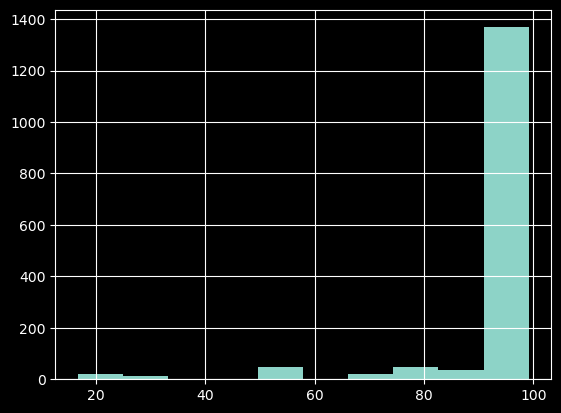

In [10]:
mrg['LNDS_RISKS'].hist()

In [11]:
mrg.shape

(1550, 51)

In [12]:
# write out the file with risk score in parquet format
mrg.to_parquet("../../data/data_v06_landslide.parquet")